In [1]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('fivethirtyeight')

In [2]:
dropout=pd.read_csv("dropout-ratio-2012-2015.csv")
gross=pd.read_csv("gross-enrollment-ratio-2013-2016.csv")
comps=pd.read_csv("percentage-of-schools-with-comps-2013-2016.csv")
electricity=pd.read_csv("percentage-of-schools-with-electricity-2013-2016.csv")
water=pd.read_csv("percentage-of-schools-with-water-facility-2013-2016.csv")
boys_toilet=pd.read_csv("schools-with-boys-toilet-2013-2016.csv")
girls_toilet=pd.read_csv("schools-with-girls-toilet-2013-2016.csv")

In [3]:
gross

,State_UT,Year,Primary_Boys,Primary_Girls,Primary_Total,Upper_Primary_Boys,Upper_Primary_Girls,Upper_Primary_Total,Secondary_Boys,Secondary_Girls,Secondary_Total,Higher_Secondary_Boys,Higher_Secondary_Girls,Higher_Secondary_Total
0,Andaman & Nicobar Islands,2013-14,95.88,91.97,93.93,94.70,88.98,91.83,102.89,97.36,100.16,105.4,96.61,101.28
1,Andhra Pradesh,2013-14,96.62,96.87,96.74,82.81,84.38,83.57,73.76,76.77,75.20,59.83,60.83,60.3
2,Arunachal Pradesh,2013-14,129.12,127.77,128.46,112.64,115.27,113.94,88.37,84.89,86.65,65.16,65.38,65.27
3,Assam,2013-14,111.77,115.16,113.43,87.85,98.69,93.13,65.60,77.20,71.21,31.78,34.27,32.94
4,Bihar,2013-14,95.03,101.15,97.96,80.60,94.92,87.24,57.66,62.96,60.08,23.33,24.17,23.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,Tripura,2014-15,109.50,110.49,109.98,118.80,122.38,120.54,119.81,121.36,120.57,46.48,40.05,43.4
106,Uttar Pradesh,2014-15,91.54,98.93,95.00,68.14,82.28,74.54,67.85,67.73,67.79,65.36,62.01,63.75
107,Uttaranchal,2014-15,100.11,101.02,100.54,84.20,87.03,85.53,90.99,89.65,90.35,79.82,80.95,80.36
108,West Bengal,2014-15,101.78,102.91,102.33,96.16,110.67,103.17,70.67,86.05,78.17,48.27,51.82,49.95


In [4]:
gross['State_UT'].value_counts()

Andaman & Nicobar Islands    3
Punjab                       3
Andhra Pradesh               3
Manipur                      3
Meghalaya                    3
Mizoram                      3
Nagaland                     3
Odisha                       3
Rajasthan                    3
Kerala                       3
Sikkim                       3
Tamil Nadu                   3
Tripura                      3
Uttar Pradesh                3
West Bengal                  3
All India                    3
Lakshadweep                  3
Maharashtra                  3
Karnataka                    3
Delhi                        3
Arunachal Pradesh            3
Assam                        3
Bihar                        3
Chandigarh                   3
Chhattisgarh                 3
Daman & Diu                  3
Dadra & Nagar Haveli         3
Goa                          3
Gujarat                      3
Haryana                      3
Himachal Pradesh             3
Jammu And Kashmir            3
Jharkhan

In [5]:
gross.set_index('State_UT',inplace=True)
gross.rename({'MADHYA PRADESH' :'Madhay Pradesh','Pondicherry' :'Puducherry'
,'Uttaranchal' : 'Uttarkhand'},inplace = True)
gross.reset_index(inplace=True)

In [6]:
electricity

,State_UT,year,Primary_Only,Primary_with_U_Primary,Primary_with_U_Primary_Sec_HrSec,U_Primary_Only,U_Primary_With_Sec_HrSec,Primary_with_U_Primary_Sec,U_Primary_With_Sec,Sec_Only,Sec_with_HrSec.,HrSec_Only,All Schools
0,Andaman & Nicobar Islands,2013-14,82.42,96.05,100.00,0.00,100.00,100.00,0.00,0.00,100.00,0.00,88.86
1,Andaman & Nicobar Islands,2014-15,80.72,96.30,100.00,100.00,100.00,100.00,0.00,0.00,100.00,0.00,88.89
2,Andaman & Nicobar Islands,2015-16,82.11,97.62,100.00,0.00,100.00,100.00,0.00,0.00,100.00,0.00,90.10
3,Andhra Pradesh,2013-14,87.66,93.57,99.32,100.00,67.48,96.19,96.15,97.50,100.00,91.27,90.34
4,Andhra Pradesh,2014-15,91.08,94.70,100.00,100.00,86.11,97.60,97.11,93.55,83.33,93.21,92.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,West Bengal,2014-15,52.52,79.66,91.75,45.63,98.16,90.91,93.59,0.00,100.00,91.67,56.96
106,West Bengal,2015-16,73.64,83.39,96.84,55.24,98.58,90.63,95.40,0.00,100.00,91.67,74.88
107,All India,2013-14,46.38,69.56,94.92,45.97,93.72,83.12,86.84,75.08,82.88,91.01,56.78
108,All India,2014-15,49.63,73.26,95.27,48.33,94.81,84.03,89.14,77.55,83.85,92.67,60.01


In [7]:
df1=gross.sort_values(by = ['State_UT'])['Primary_Total']
df2 = electricity.sort_values(by=['State_UT'])['Primary_Only']

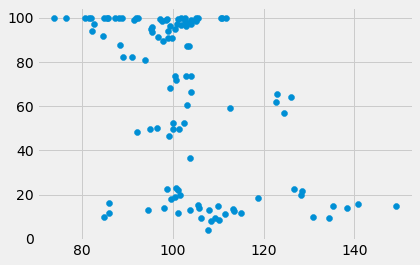

In [8]:
plt.scatter(df1,df2)

In [9]:
water

,State/UT,Year,Primary_Only,Primary_with_U_Primary,Primary_with_U_Primary_Sec_HrSec,U_Primary_Only,U_Primary_With_Sec_HrSec,Primary_with_U_Primary_Sec,U_Primary_With_Sec,Sec_Only,Sec_with_HrSec.,HrSec_Only,All Schools
0,Andaman & Nicobar Islands,2013-14,98.17,98.68,100.00,0.00,100.00,100.00,0.00,0.00,100.00,0.00,98.69
1,Andaman & Nicobar Islands,2014-15,99.55,98.77,100.00,100.00,100.00,100.00,0.00,0.00,100.00,0.00,99.52
2,Andaman & Nicobar Islands,2015-16,100.00,100.00,100.00,0.00,100.00,100.00,0.00,0.00,100.00,0.00,100.00
3,Andhra Pradesh,2013-14,86.89,94.53,99.66,90.91,87.26,98.84,96.02,97.50,100.00,97.52,90.35
4,Andhra Pradesh,2014-15,91.85,96.07,100.00,100.00,90.00,99.56,97.48,100.00,100.00,98.37,93.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,West Bengal,2014-15,98.00,96.20,96.56,95.49,99.70,98.99,99.32,0.00,100.00,91.67,97.93
106,West Bengal,2015-16,98.43,97.22,100.00,96.92,99.75,99.17,99.28,0.00,100.00,100.00,98.42
107,All India,2013-14,94.09,98.18,99.10,93.90,99.20,98.64,97.38,96.52,98.18,97.14,95.40
108,All India,2014-15,94.88,98.49,99.59,94.82,99.38,98.83,98.49,96.32,98.71,98.23,96.12


In [10]:
df3 = water.sort_values(by = ['State/UT'])['Primary_Only']

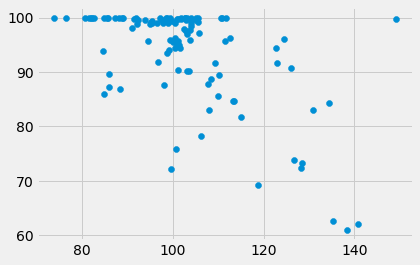

In [11]:
plt.scatter(df1,df3)

In [12]:
comps

,State_UT,year,Primary_Only,Primary_with_U_Primary,Primary_with_U_Primary_Sec_HrSec,U_Primary_Only,U_Primary_With_Sec_HrSec,Primary_with_U_Primary_Sec,U_Primary_With_Sec,Sec_Only,Sec_with_HrSec.,HrSec_Only,All Schools
0,Andaman & Nicobar Islands,2013-14,30.40,73.68,89.74,0.00,100.00,97.92,0.00,0.00,100.00,0.00,53.06
1,Andaman & Nicobar Islands,2014-15,30.94,76.54,92.11,100.00,94.74,100.00,0.00,0.00,100.00,0.00,57.25
2,Andaman & Nicobar Islands,2015-16,28.44,78.57,92.50,0.00,94.74,100.00,0.00,0.00,100.00,0.00,57.00
3,Andhra Pradesh,2013-14,12.73,42.72,86.99,45.45,17.07,68.18,73.23,60.00,33.33,19.32,29.57
4,Andhra Pradesh,2014-15,10.29,44.15,88.46,50.00,62.22,68.38,76.59,70.97,66.67,41.60,28.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,West Bengal,2014-15,4.55,39.79,70.27,9.32,78.72,61.28,49.07,0.00,0.00,66.67,12.13
106,West Bengal,2015-16,4.69,41.56,75.71,9.97,79.93,63.91,50.49,0.00,100.00,66.67,12.67
107,All India,2013-14,9.25,42.14,82.67,18.22,76.50,64.69,59.25,44.80,39.31,26.65,24.08
108,All India,2014-15,10.32,44.39,81.96,19.40,79.86,62.66,68.11,51.27,50.26,47.96,26.42


In [13]:
comps['State_UT'].value_counts()

Andaman & Nicobar Islands    3
Andhra Pradesh               3
Maharashtra                  3
Manipur                      3
Meghalaya                    3
Mizoram                      3
Nagaland                     3
Odisha                       3
Puducherry                   3
Punjab                       3
Rajasthan                    3
Sikkim                       3
Tamil Nadu                   3
Tripura                      3
Uttar Pradesh                3
Uttarakhand                  3
West Bengal                  3
Madhya Pradesh               3
Lakshadweep                  3
Kerala                       3
Karnataka                    3
Arunachal Pradesh            3
Assam                        3
Bihar                        3
Chandigarh                   3
Chhattisgarh                 3
Dadra & Nagar Haveli         3
Daman & Diu                  3
Delhi                        3
Goa                          3
Gujarat                      3
Haryana                      3
Himachal

In [14]:
df4 =comps.sort_values(by = ['State_UT'])['Primary_Only']

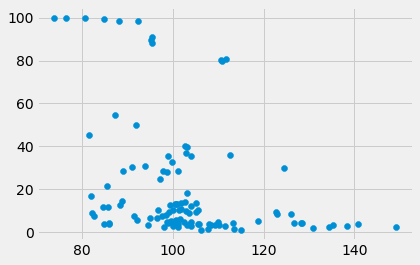

In [15]:
plt.scatter(df1,df4)

In [16]:
boys_toilet

,State_UT,year,Primary_Only,Primary_with_U_Primary,Primary_with_U_Primary_Sec_HrSec,U_Primary_Only,U_Primary_With_Sec_HrSec,Primary_with_U_Primary_Sec,U_Primary_With_Sec,Sec_Only,Sec_with_HrSec.,HrSec_Only,All Schools
0,Andaman & Nicobar Islands,2013-14,91.58,97.37,100.00,0.00,100.00,100.00,0.00,0.00,100.00,0.00,94.52
1,Andaman & Nicobar Islands,2014-15,100.00,100.00,100.00,100.00,100.00,100.00,0.00,0.00,100.00,0.00,100.00
2,Andaman & Nicobar Islands,2015-16,100.00,100.00,100.00,0.00,100.00,100.00,0.00,0.00,100.00,0.00,100.00
3,Andhra Pradesh,2013-14,53.03,62.58,82.05,45.45,64.11,76.24,60.63,59.26,85.71,73.44,56.88
4,Andhra Pradesh,2014-15,57.91,76.51,96.00,75.00,93.33,91.43,77.99,80.65,60.00,86.54,65.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,West Bengal,2014-15,89.45,80.43,80.73,87.89,99.37,94.04,97.97,0.00,100.00,100.00,89.93
106,West Bengal,2015-16,97.53,92.44,93.38,98.86,99.83,95.43,99.64,0.00,100.00,100.00,97.70
107,All India,2013-14,84.01,91.44,97.91,88.14,96.05,94.51,80.89,97.97,94.68,74.36,86.56
108,All India,2014-15,85.66,93.93,98.59,88.12,98.63,96.35,87.28,89.10,93.09,88.97,88.62


In [17]:
boys_toilet['State_UT'].value_counts()

Andaman & Nicobar Islands    3
Andhra Pradesh               3
Maharashtra                  3
Manipur                      3
Meghalaya                    3
Mizoram                      3
Nagaland                     3
Odisha                       3
Puducherry                   3
Punjab                       3
Rajasthan                    3
Sikkim                       3
Tamil Nadu                   3
Tripura                      3
Uttar Pradesh                3
Uttarakhand                  3
West Bengal                  3
Madhya Pradesh               3
Lakshadweep                  3
Kerala                       3
Karnataka                    3
Arunachal Pradesh            3
Assam                        3
Bihar                        3
Chandigarh                   3
Chhattisgarh                 3
Dadra & Nagar Haveli         3
Daman & Diu                  3
Delhi                        3
Goa                          3
Gujarat                      3
Haryana                      3
Himachal

In [18]:
df5 =boys_toilet.sort_values(by = ['State_UT'])['Primary_Only']

In [19]:
df5

109     96.45
107     84.01
108     85.66
0       91.58
2      100.00
        ...  
102     96.31
103     97.18
104     80.34
105     89.45
106     97.53
Name: Primary_Only, Length: 110, dtype: float64

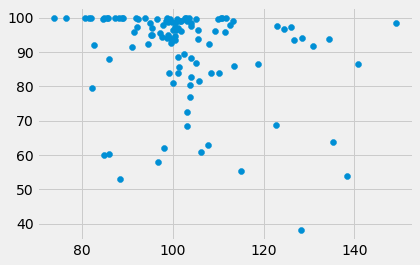

In [20]:
plt.scatter(df1,df5)

In [21]:
girls_toilet

,State_UT,year,Primary_Only,Primary_with_U_Primary,Primary_with_U_Primary_Sec_HrSec,U_Primary_Only,U_Primary_With_Sec_HrSec,Primary_with_U_Primary_Sec,U_Primary_With_Sec,Sec_Only,Sec_with_HrSec.,HrSec_Only,All Schools
0,All India,2013-14,88.68,95.98,98.81,91.39,98.25,97.33,94.40,99.06,98.36,76.14,91.23
1,All India,2014-15,91.21,96.92,99.48,91.39,99.23,98.19,96.61,90.26,94.05,90.94,93.08
2,All India,2015-16,96.95,99.03,99.72,96.32,99.60,99.31,98.82,95.18,98.31,96.22,97.52
3,Andaman & Nicobar Islands,2013-14,89.74,97.37,100.00,0.00,100.00,100.00,0.00,0.00,100.00,0.00,93.44
4,Andaman & Nicobar Islands,2014-15,100.00,100.00,100.00,100.00,100.00,100.00,0.00,0.00,100.00,0.00,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,Uttarakhand,2014-15,95.43,98.91,99.78,97.14,98.03,100.00,97.29,73.73,88.39,91.67,95.97
106,Uttarakhand,2015-16,96.71,98.99,100.00,97.68,98.02,100.00,98.41,91.88,94.74,100.00,97.18
107,West Bengal,2013-14,80.02,86.40,96.24,83.50,99.25,94.05,98.64,0.00,0.00,0.00,82.08
108,West Bengal,2014-15,91.69,89.91,96.13,91.98,99.74,95.82,99.33,0.00,100.00,100.00,92.42


In [22]:
girls_toilet['State_UT'].value_counts()

All India                    3
Andaman & Nicobar Islands    3
Madhya Pradesh               3
Maharashtra                  3
Manipur                      3
Meghalaya                    3
Mizoram                      3
Nagaland                     3
Odisha                       3
Puducherry                   3
Punjab                       3
Rajasthan                    3
Sikkim                       3
Tamil Nadu                   3
Tripura                      3
Uttar Pradesh                3
Uttarakhand                  3
Lakshadweep                  3
Kerala                       3
Karnataka                    3
Jharkhand                    3
Andhra Pradesh               3
Arunachal Pradesh            3
Assam                        3
Bihar                        3
Chandigarh                   3
Chhattisgarh                 3
Dadra & Nagar Haveli         3
Daman & Diu                  3
Delhi                        3
Goa                          3
Gujarat                      3
Haryana 

In [23]:
df6 =girls_toilet.sort_values(by = ['State_UT'])['Primary_Only']

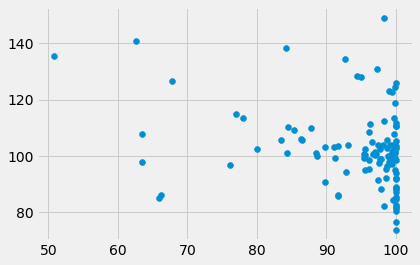

In [24]:
plt.scatter(df6,df1)

In [25]:
def de_mean(x):
    x_bar = np.mean(x)
    return [x_i - x_bar for x_i in x]

def covariance(x, y):
    n = len(x)
    return np.dot(de_mean(x), de_mean(y)) / (n - 1)


In [26]:
def correlation(x, y):
    std_x = np.std(x)
    std_y = np.std(y)
    if std_x > 0 and std_y > 0:
        return covariance(x, y) / (std_x * std_y)
        # we can also return covariance(x, y) / std_x / std_y
    else:
        return 0

In [27]:
correlation(df1,df2)

-0.5052932139586529

In [28]:
correlation(df1,df3)

-0.5860876941025648

In [29]:
correlation(df1,df4)

-0.3695069407023588

In [30]:
correlation(df1,df5)

-0.22713958595881759

In [31]:
correlation(df1,df6)

-0.27525290582698364

In [32]:
def SpearmanCorrelation(x, y):
    xranks = pd.Series(x).rank()
    yranks = pd.Series(y).rank()
    return correlation(xranks, yranks)

In [33]:
SpearmanCorrelation(df1,df2)

-0.493617708699487

In [34]:
SpearmanCorrelation(df1,df3)

-0.500751640610984

In [35]:
SpearmanCorrelation(df1,df4)

-0.46749009366958705

In [36]:
SpearmanCorrelation(df1,df5)

-0.3168021538590561

In [37]:
SpearmanCorrelation(df1,df6)

-0.3118662983873979

In [38]:
def EvalCdf(sample, x):
    count = 0
    for i in sample:
        if i <= x:
            count += 1
    prob = count / len(sample)
    return prob

In [39]:
sample =[1,2,3,4]
x=4
EvalCdf(sample,x)

1.0

In [40]:
cdf1 = [EvalCdf(df1, x) for x in sorted(df1)]
cdf2 = [EvalCdf(df5, x) for x in sorted(df5)]

In [41]:
len(cdf2)

110

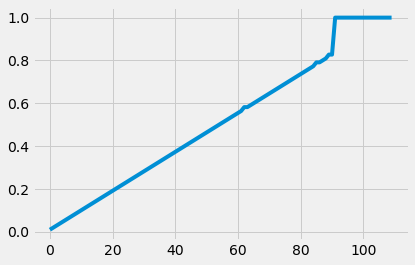

In [42]:
plt.plot(cdf2)

In [43]:
def PearsonMedianCoeff(sample,xbar,median):
    gp =3 *(xbar - median)/len(sample)
    return gp

In [44]:
print(PearsonMedianCoeff(df1, np.mean(df1), np.median(df1)))
print(PearsonMedianCoeff(df6, np.mean(df2), np.median(df6)))

0.03832314049586888
-0.9746033057851236


In [45]:
import math
log_ordered_df1 = [math.log(x) for x in df1]
log_ordered_df2 = [math.log(x) for x in df6]

In [46]:
correlation(log_ordered_df1, log_ordered_df2)

-0.26353627998626034